In [12]:
import ast
import math
import pickle
import matplotlib.pyplot as plt
import numpy as np 
from collections import Counter
from sklearn.externals import joblib
from sklearn.metrics.pairwise import cosine_similarity

In [44]:
actor_dir_genr_sim_matr = pickle.load(open("actor_dir_genr_sim_matr1",'rb'))

In [45]:
overview_sim_matr = pickle.load(open("overview_sim_matr1",'rb'))

In [46]:
actor_dir_genr_sim_matr.shape

(4320, 4320)

In [47]:
np.unique(actor_dir_genr_sim_matr[0])

array([0.0015194 , 0.00160716, 0.00162261, ..., 0.26253826, 0.33844409,
       1.        ])

In [40]:
min(np.unique(actor_dir_genr_sim_matr[0]))

0.001519396145393318

In [48]:
Counter(actor_dir_genr_sim_matr[0]).most_common(70)

[(0.010811085186612687, 29),
 (0.004145314314226262, 9),
 (0.003309740739386037, 9),
 (0.005473775391692044, 8),
 (0.0063116695092392296, 7),
 (0.007708517277661395, 7),
 (0.003353318946506622, 6),
 (0.003331316088360451, 5),
 (0.059482534757531416, 5),
 (0.004900044799445114, 4),
 (0.003169244370024012, 4),
 (0.004616734245653342, 3),
 (0.004187940519166301, 3),
 (0.010811085186612689, 3),
 (0.011642720563664579, 3),
 (0.005077561861228286, 3),
 (0.005044890989448075, 3),
 (0.0034956521596870432, 3),
 (0.003657797972453537, 3),
 (0.009438885228640479, 3),
 (0.00394942815711956, 2),
 (0.003509563559868261, 2),
 (0.004475640182267781, 2),
 (0.003375763621207766, 2),
 (0.006465276520422726, 2),
 (0.009116214936930107, 2),
 (0.005677959270289046, 2),
 (0.003969524049702331, 2),
 (0.004053348709693707, 2),
 (0.0032581958435839034, 2),
 (0.005573063984245593, 2),
 (0.0035471120037217294, 2),
 (0.003234546666627228, 2),
 (0.007708517277661397, 2),
 (0.003878764020086118, 2),
 (0.003913617703

In [41]:
Counter(overview_sim_matr[0]).most_common(70)

[(0.0, 109),
 (1.0000000000000002, 1),
 (0.02349545946490282, 1),
 (0.00890460175667191, 1),
 (0.026995355783626464, 1),
 (0.016487382077914867, 1),
 (0.03600312708400116, 1),
 (0.023439036784577184, 1),
 (0.010740328759893586, 1),
 (0.08205200599743329, 1),
 (0.026334630816362094, 1),
 (0.029737401560651123, 1),
 (0.09076327087017216, 1),
 (0.037977834311850985, 1),
 (0.05359032286845933, 1),
 (0.04724338872302486, 1),
 (0.02957425717049895, 1),
 (0.026966308001626135, 1),
 (0.018670748246252047, 1),
 (0.02994490838210471, 1),
 (0.02768012165572841, 1),
 (0.022235590542849955, 1),
 (0.02177409480528507, 1),
 (0.03229465840579511, 1),
 (0.04749945083627816, 1),
 (0.043078026137633944, 1),
 (0.0325864138426256, 1),
 (0.032644701614421776, 1),
 (0.020022909366491926, 1),
 (0.017303014204078364, 1),
 (0.02242594008046674, 1),
 (0.031029665197814874, 1),
 (0.0419954440413144, 1),
 (0.0032124019182862553, 1),
 (0.015169880932383587, 1),
 (0.04770566533322845, 1),
 (0.05550126504060099, 1),


In [4]:
all_doc = pickle.load(open("all_doc_1",'rb'))

In [5]:
actor_dir_genr_key_docs, overview_docs, mapping = all_doc[0], all_doc[1], all_doc[2] 

In [6]:
# mapping.index(832)
len(actor_dir_genr_key_docs)

4320

In [7]:
train_and_test_dict = pickle.load(open("train_and_test_dict_1",'rb'))

In [8]:
train_dict, test_dict = train_and_test_dict[0], train_and_test_dict[1]

In [9]:
len(train_dict)

5100

In [10]:
len(test_dict)

900

In [13]:
def user_pred_errors(user_ratings, ratio, sim_matr_1, sim_matr_2, mapping):
    movie_ids = list(user_ratings.keys())
    np.random.shuffle(movie_ids)
    train_pts = len(movie_ids) - int(0.2 * len(movie_ids))
    
    train_ratings = np.array([user_ratings[mid] for mid in movie_ids[:train_pts]])
    train_ind = [mapping.index(mid) for mid in movie_ids[:train_pts]]
    
    test_ratings = np.array([user_ratings[mid] for mid in movie_ids[train_pts:]])
    test_ind = [mapping.index(mid) for mid in movie_ids[train_pts:]]
    
    user_mean = np.mean(train_ratings)
    errors = []
    for i in range(len(test_ratings)):
        pred = 0
        sim_sum = 0
        for j in range(len(train_ratings)):
            pred += ((sim_matr_1[test_ind[i]][train_ind[j]] * ratio) + (sim_matr_2[test_ind[i]][train_ind[j]] * (1-ratio))) * (train_ratings[j] - user_mean)
            sim_sum += ((sim_matr_1[test_ind[i]][train_ind[j]] * ratio) + (sim_matr_2[test_ind[i]][train_ind[j]] * (1-ratio)))
        pred = pred / sim_sum
        pred = pred + user_mean
        error = (pred - test_ratings[i])**2
        errors.append(error)
    return errors    

In [14]:
def training(train_user_dict, sim_matr_1, sim_matr_2, mapping, start, incr): 
    a = []
    rmse = []
    print("Tested for alpha: ", end='')
    for alpha in np.arange(start, 1.0, incr):
        alpha = round(alpha,3)
        error = []
        for j in train_user_dict.keys():
            error += user_pred_errors(train_user_dict[j], alpha, sim_matr_1, sim_matr_2, mapping)
        
        error = np.array(error)
        mean_all = np.mean(error)
        sv = mean_all ** 0.5
        rmse.append(sv)
        a.append(alpha)
        print(alpha, end=' ')
    print()
    return a, rmse 

In [19]:
ratios, rmse = training(train_dict, actor_dir_genr_sim_matr, overview_sim_matr, mapping, 0, 0.05)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


[0.0]
[0.0, 0.05]
[0.0, 0.05, 0.1]
[0.0, 0.05, 0.1, 0.15000000000000002]
[0.0, 0.05, 0.1, 0.15000000000000002, 0.2]
[0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.25]
[0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.30000000000000004]
[0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.30000000000000004, 0.35000000000000003]
[0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.30000000000000004, 0.35000000000000003, 0.4]
[0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.30000000000000004, 0.35000000000000003, 0.4, 0.45]
[0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.30000000000000004, 0.35000000000000003, 0.4, 0.45, 0.5]
[0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.30000000000000004, 0.35000000000000003, 0.4, 0.45, 0.5, 0.55]
[0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.30000000000000004, 0.35000000000000003, 0.4, 0.45, 0.5, 0.55, 0.6000000000000001]
[0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.30000000000000004, 0.35000000000000003, 0.4, 0.45, 0.5, 0.55, 0.60000000

In [53]:
def get_plot(x, y, axis_names=['x-axis','y-axis'], title = ''):
    plt.figure(figsize=(12,5))
    plt.plot(x, y) 
    plt.xlabel(axis_names[0])
    plt.ylabel(axis_names[1]) 
#     plt.xlim(0.0,1)
    xi = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.30, 0.35, 0.4, 0.45, 0.5, 0.55, 0.60, 0.65, 0.70, 0.75, 0.8, 0.85, 0.9, 0.95]
    plt.xticks(xi)
    plt.title(title,fontweight='bold')
    plt.grid()
    plt.show()

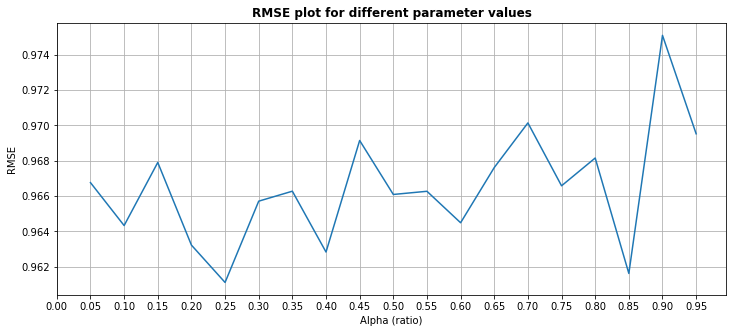

In [54]:
get_plot(ratios, rmse, axis_names=['Alpha (ratio)','RMSE'], title = 'RMSE plot for different parameter values')

In [28]:
rmse.index(min(rmse[1:]))

5

In [27]:
rmse

[nan,
 0.966760225603386,
 0.9643263123339494,
 0.967903088435672,
 0.9632195022536243,
 0.9611016986025458,
 0.9657089529499641,
 0.9662738041096729,
 0.9628256173167173,
 0.9691485498331313,
 0.9660886332045807,
 0.9662689423854451,
 0.9644853618646442,
 0.9676144504064641,
 0.9701441927320007,
 0.9665797902693701,
 0.9681548722510601,
 0.9616118499418413,
 0.9751075288763728,
 0.9695276647522366]

In [29]:
def testing(test_user_dict, sim_matr_1, sim_matr_2, mapping, alpha): 
    error = []
    for j in test_user_dict.keys():
        error += user_pred_errors(test_user_dict[j], alpha, sim_matr_1, sim_matr_2, mapping)
    error = np.array(error)
    mean_all = np.mean(error)
    rmse = mean_all ** 0.5
    return rmse

In [31]:
test_rmse = testing(test_dict, actor_dir_genr_sim_matr, overview_sim_matr, mapping, 0.25)

In [32]:
test_rmse

0.9409632226727233